<a href="https://colab.research.google.com/github/yashwanthbooram/ADULT-INCOME-PREDICTION-USING-MACHINE-LEARNING/blob/main/ADULT_INCOME_PREDICTION_USING_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#%pip install matplotlib
#%pip install seaborn
#%pip install pandas
#%pip install sklearn

In [5]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:

data = pd.read_csv('adult.csv')

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
# Shape of training data (num_rows, num_columns)
data.shape


(48842, 15)

In [9]:

# List column names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
# Show statistical caracterisctics of data
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Data cleaning and preprocessing

In [11]:
df = pd.DataFrame(data)

# Number of missing values in each column of training data
missing_val = (df == '?').sum()

# Replace '?' with NaN (Not a Number)
df.replace('?', np.nan, inplace=True)

print("Missing values in data :")
print(missing_val[missing_val > 0])

Missing values in data :
workclass         2799
occupation        2809
native-country     857
dtype: int64


In [12]:
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [13]:
# Imputer for numerical data
num_imputer = SimpleImputer(strategy='median')
# Imputer for categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df)

        age     workclass    fnlwgt     education  educational-num  \
0      25.0       Private  226802.0          11th              7.0   
1      38.0       Private   89814.0       HS-grad              9.0   
2      28.0     Local-gov  336951.0    Assoc-acdm             12.0   
3      44.0       Private  160323.0  Some-college             10.0   
4      18.0       Private  103497.0  Some-college             10.0   
...     ...           ...       ...           ...              ...   
48837  27.0       Private  257302.0    Assoc-acdm             12.0   
48838  40.0       Private  154374.0       HS-grad              9.0   
48839  58.0       Private  151910.0       HS-grad              9.0   
48840  22.0       Private  201490.0       HS-grad              9.0   
48841  52.0  Self-emp-inc  287927.0       HS-grad              9.0   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      

In [14]:

# Verify we no longer have missing values
missing_val = df.isnull().sum()

print("Missing values in data :")
print(missing_val[missing_val > 0])

Missing values in data :
Series([], dtype: int64)


In [15]:
# Show unique values in categorical columns
for column in categorical_cols:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'workclass': ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in 'education': ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Unique values in 'marital-status': ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in 'occupation': ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
Unique values in 'relationship': ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Unique values in 'race': ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Unique values in 'gender': ['Male

In [16]:

# Replace categorical values with numerical values

education_order = {
    'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3, '9th': 4,
    '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8, 'Some-college': 9,
    'Assoc-voc': 10, 'Assoc-acdm': 11, 'Prof-school': 12, 'Bachelors': 13,
    'Masters': 14, 'Doctorate': 15
}
workclass_order = {
    'Never-worked': 0, 'Without-pay': 1, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3,
    'Private': 4, 'Local-gov': 5, 'State-gov': 6, 'Federal-gov': 7
}
marital_status_order = {
    'Never-married': 0, 'Married-spouse-absent': 1, 'Separated': 2,
    'Divorced': 3, 'Widowed': 4, 'Married-civ-spouse': 5, 'Married-AF-spouse': 6
}
occupation_order = {
    'Priv-house-serv': 0, 'Other-service': 1, 'Handlers-cleaners': 2, 'Farming-fishing': 3,
    'Machine-op-inspct': 4, 'Transport-moving': 5, 'Craft-repair': 6, 'Adm-clerical': 7,
    'Sales': 8, 'Tech-support': 9, 'Protective-serv': 10, 'Prof-specialty': 11,
    'Exec-managerial': 12, 'Armed-Forces': 13
}
relationship_order = {
    'Own-child': 0, 'Other-relative': 1, 'Not-in-family': 2,
    'Unmarried': 3, 'Wife': 4, 'Husband': 5
}

income_order = {
    '<=50K': 0, '>50K': 1
}

df['education'] = df['education'].replace(education_order)
df['relationship'] = df['relationship'].replace(relationship_order)
df['occupation'] = df['occupation'].replace(occupation_order)
df['marital-status'] = df['marital-status'].replace(marital_status_order)
df['workclass'] = df['workclass'].replace(workclass_order)
df['income'] = df['income'].replace(income_order)

In [17]:
# This is an arbitrary grouping intended for demonstration purposes and does not accurately reflect the complexities of global economic status.
country_group = {
    # Group 1: United States and countries with similar high-income economies and global influence.
    'United-States': 1, 'Canada': 1, 'England': 1, 'Germany': 1, 'Ireland': 1,
    'France': 1, 'Holand-Netherlands': 1, 'Italy': 1, 'Scotland': 1,

    # Group 2: Emerging economies with significant growth, industrialization, and middle-income status.
    'Philippines': 2, 'India': 2, 'China': 2, 'Taiwan': 2, 'Japan': 2,
    'South': 2, 'Iran': 2, 'Hong': 2,

    # Group 3: Developing countries, generally considered lower-income but with varying levels of development.
    'Mexico': 3, 'Puerto-Rico': 3, 'El-Salvador': 3, 'Cuba': 3, 'Jamaica': 3,
    'Dominican-Republic': 3, 'Guatemala': 3, 'Columbia': 3, 'Haiti': 3,
    'Nicaragua': 3, 'Peru': 3, 'Ecuador': 3, 'Trinadad&Tobago': 3,

    # Group 4: Countries with less industrialization and those not fitting neatly into the other three categories.
    'Vietnam': 4, 'Thailand': 4, 'Cambodia': 4, 'Laos': 4, 'Yugoslavia': 4,
    'Poland': 4, 'Hungary': 4, 'Portugal': 4, 'Greece': 4,
    'Outlying-US(Guam-USVI-etc)': 4, 'Honduras': 4
}

df['native-country'] = df['native-country'].replace(country_group)

In [18]:
# Applying one-hot encoding for othe categorical values
race_dummies = pd.get_dummies(df['race'], prefix='race')
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')

# Joining the new one-hot encoded columns back to the original DataFrame
df = pd.concat([df, race_dummies], axis=1)
df = pd.concat([df, gender_dummies], axis=1)

# Drop the original columns
df.drop('race', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)

In [19]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25.0,4,226802.0,6,7.0,0,4,0,0.0,0.0,40.0,1,0,False,False,True,False,False,False,True
1,38.0,4,89814.0,8,9.0,5,3,5,0.0,0.0,50.0,1,0,False,False,False,False,True,False,True
2,28.0,5,336951.0,11,12.0,5,10,5,0.0,0.0,40.0,1,1,False,False,False,False,True,False,True
3,44.0,4,160323.0,9,10.0,5,4,5,7688.0,0.0,40.0,1,1,False,False,True,False,False,False,True
4,18.0,4,103497.0,9,10.0,0,11,0,0.0,0.0,30.0,1,0,False,False,False,False,True,True,False


In [20]:

df.shape

(48842, 20)

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male'],
      dtype='object')

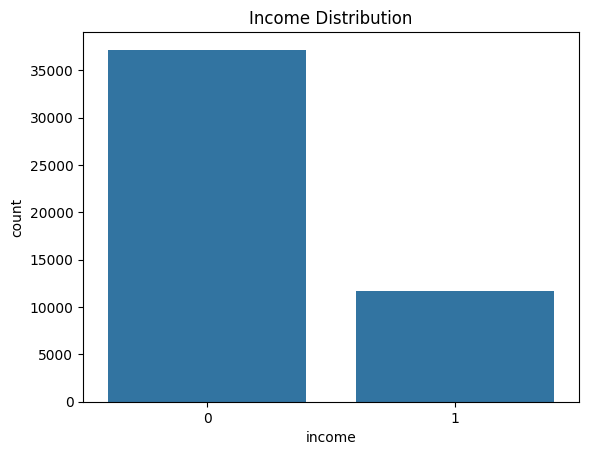

In [22]:
# Distribution of the 'income' column
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

Exploratory Data Analysis (EDA)

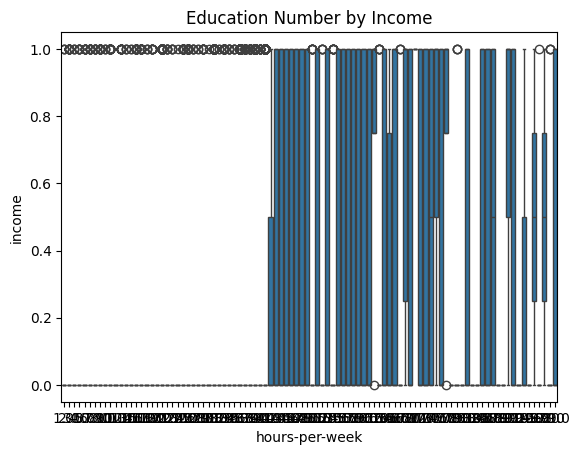

In [23]:
# Box plots for 'education' and 'income'
sns.boxplot(x='hours-per-week', y='income', data=df)
plt.title('Education Number by Income')
plt.show()

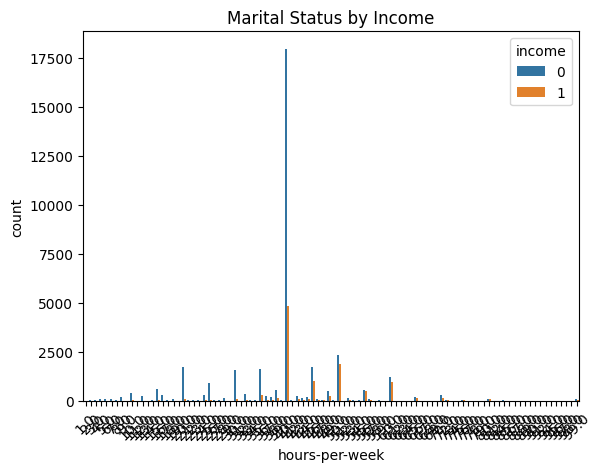

In [24]:
# Count plots for 'marital-status' and 'income'
sns.countplot(x='hours-per-week', hue='income', data=df)
plt.title('Marital Status by Income')
plt.xticks(rotation=45)
plt.show()

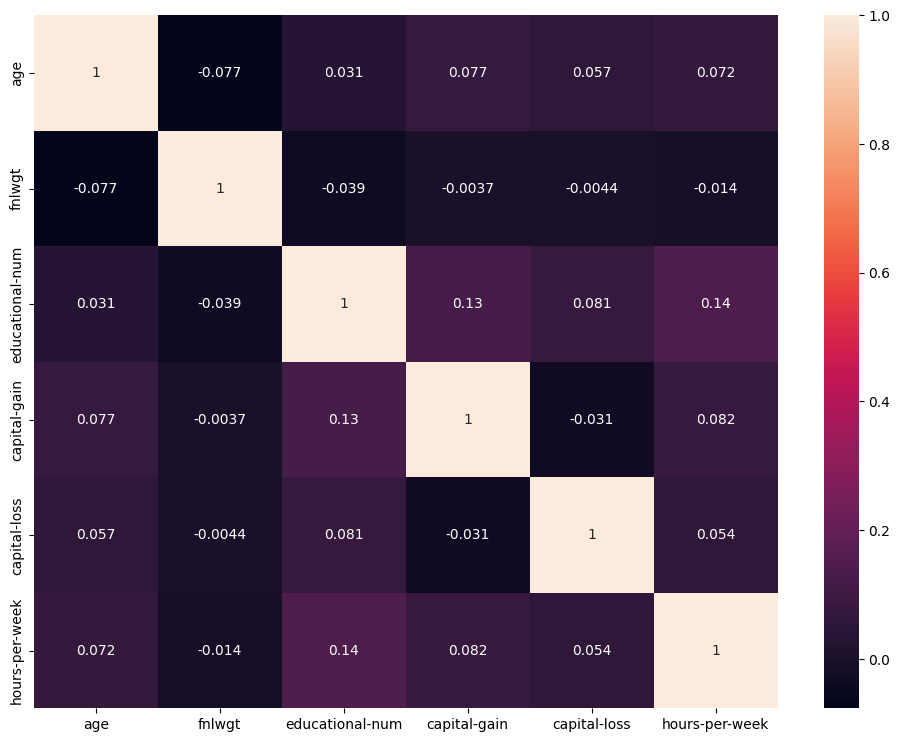

In [25]:
# Correlation matrix heatmap
df_corr = data.astype("float64",errors='ignore')
df_corr = df_corr.select_dtypes(exclude="object")
plt.subplots(figsize=(12,9))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

In [26]:
# Define features and target
X = df.drop('income', axis=1)
y = df['income']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Accuracy: 0.86
Mean Absolute Error (MAE): 0.14


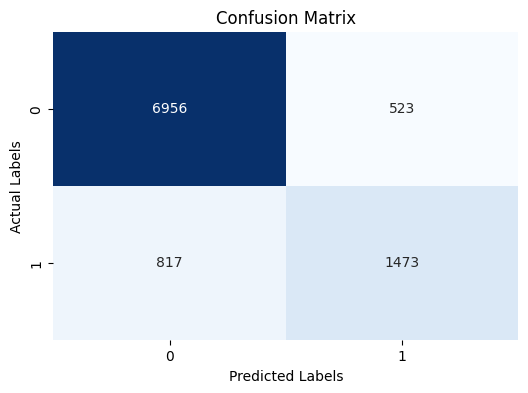

In [28]:
# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:

# Define the feature values for a person : [35, 'Private', 200000, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 5000, 0, 45, 'United-States', 0, 0, 0, 0, 1, 0, 1]
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                 'marital-status', 'occupation', 'relationship', 'capital-gain',
                 'capital-loss', 'hours-per-week', 'native-country',
                 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
                 'race_Other', 'race_White', 'gender_Female', 'gender_Male']

person = [25, 4, 226802.0, 6, 7, 0, 4, 0, 0, 0, 40, 1, 0, 0, 1, 0, 0, 0, 1]

df_person = pd.DataFrame([person], columns=feature_names)

# Predict income
pred = model.predict(df_person)

# Display result
if pred:
    income = ">50K"
else:
    income = "<=50K"

print("Estimated income :",income)

Estimated income : <=50K
